# Logistic Regression

Logistic regression with Ridge regularization for binary classification is implemented in the class [`LogReg`](../utils/linear.py) using gradient descent. 

## Prediction Function

The sigmoid function is applied to linear regression:

$$
\hat{\mathbf{y}} = \sigma(\mathbf{X} \boldsymbol{\beta}) = \frac{1}{1 + e^{-(\mathbf{X} \boldsymbol{\beta})}}
$$

Where:
- $ \hat{\mathbf{y}} \in \mathbb{R}^{n \times 1} $ ... vector of predicted probabilities  
- $ n $ samples  
- $ \mathbf{X} \in \mathbb{R}^{n \times (d + 1)} $ ... feature matrix with:
  - $ d $ features  
  - A column of ones (intercept term)  
- $ \boldsymbol{\beta} \in \mathbb{R}^{(d + 1) \times 1} $ ... vector of coefficients, where:  
  - $ \beta_0 $ is the intercept 
  - $ \beta_1, \beta_2, \ldots, \beta_d $ are the feature weights  

---

## Loss Function
The binary cross-entropy loss with L2 regularization in matrix notation is defined as:

$$
\mathcal{L}(\boldsymbol{\beta}) = 
- \mathbf{y}^\top \log \hat{\mathbf{y}} 
- (\mathbf{1} - \mathbf{y})^\top \log (\mathbf{1} - \hat{\mathbf{y}})
+ \alpha \boldsymbol{\beta}^\top \boldsymbol{\beta}
$$

Where:
- $ \mathbf{y} \in \mathbb{R}^{n \times 1} $ ... vector of true binary target labels  
- $ \hat{\mathbf{y}} = \sigma(\mathbf{X} \boldsymbol{\beta}) $ ... vector of predicted probabilities  
- $ \mathbf{1} $ ... vector of ones for element-wise subtraction  
- $ \alpha $ ... regularization parameter  
- $ \boldsymbol{\beta}^\top \boldsymbol{\beta} $ ... L2 regularization term (sum of squared coefficients)  

---


## Differentiate the Loss Function

The gradient to minimize the loss function is obtained by computing its derivative with respect to $ \boldsymbol{\beta} $.  


### Regularization Term
$$
\frac{\partial }{\partial \boldsymbol{\beta}}  \alpha \boldsymbol{\beta}^\top \boldsymbol{\beta} = 2\alpha \boldsymbol{\beta}
$$

### Binary Cross-Entropy Term

Computing the derivative of the binary cross-entropy term can be found from  multiple sources ([exampe](https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient)). It is somewhat lengthy, but simplifies to:

$$
\frac{\partial }{\partial \boldsymbol{\beta}} 
(- \mathbf{y}^\top \log \hat{\mathbf{y}} - (\mathbf{1} - \mathbf{y})^\top \log (\mathbf{1} - \hat{\mathbf{y}})) = \mathbf{X}^\top (\hat{\mathbf{y}} - \mathbf{y})
$$

### Combined
$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\beta}} =  \mathbf{X}^\top (\hat{\mathbf{y}} - \mathbf{y}) + 2\alpha \boldsymbol{\beta}

$$

## Imports & Settings

In [1]:
### Imports
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
### Add the utils directory to the path
sys.path.append(os.path.abspath("../utils"))
import linear

In [3]:
### Settings
SEED = 2
np.random.seed(SEED)

# Data
A pre-processed data set on [BRD4](https://github.com/HoffOskar/QSAR_BRD4) inhibitors are used. 



In [4]:
### Load the data
X_morgan_2048 = np.loadtxt("data/X_morgan_2048.csv", delimiter=",")
y_df = pd.read_csv("data/y.csv")

### Check shapes
X_morgan_2048.shape, y_df.shape

((2397, 2048), (2397, 2))

In [5]:
### Split the data
X_train, X_test, y_train, y_test = train_test_split(X_morgan_2048, y_df['active'].to_numpy(), test_size=0.2, random_state=SEED)

### Check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1917, 2048), (1917,), (480, 2048), (480,))

# Model test

In [6]:
### Define the learning rate
lr = 0.01

### Define the number of iterations
it = 300

### Define regularization parameters
alphas = np.logspace(-4, 2, num=5)
alphas = [0.001, 0.1, 1, 10]

### Containers for the errors
train_scores = []
test_scores = []

for alpha in alphas:
    ### Fit the model
    model = linear.LogReg(alpha=alpha, learning_rate=lr, max_iter=it)
    model.fit(X_train, y_train)
    
    ### Compute the train RMSEs
    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    ### Compute the test RMSEs
    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

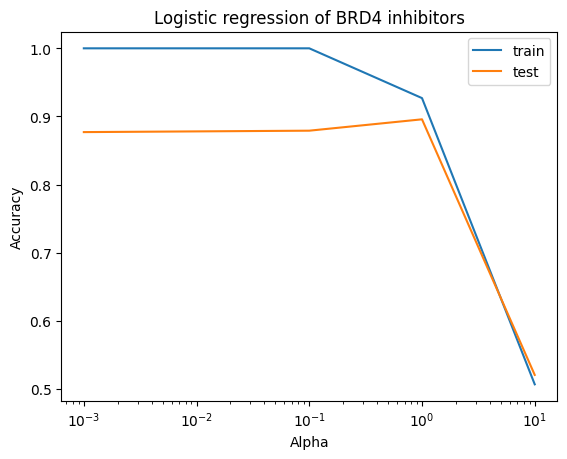

In [7]:
### Plot
plt.plot(alphas, train_scores, label='train')
plt.plot(alphas, test_scores, label='test')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Logistic regression of BRD4 inhibitors')
plt.show()

The plot shows overfitting for $\alpha < 1$ and clear underfitting $\alpha > 1$. 